In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [25]:
df = pd.read_csv("../input/Admission_Predict_Ver1.1.csv",sep = ",")

In [26]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

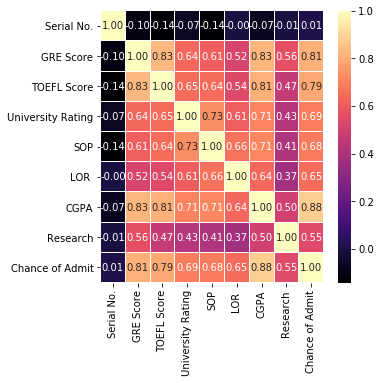

In [27]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

Not Having Research: 220
Having Research: 280


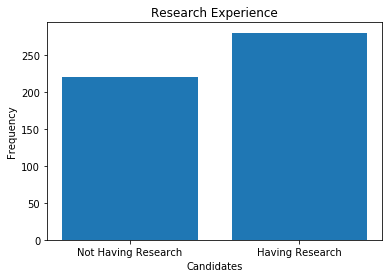

In [28]:
#Research
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Candidates")
plt.ylabel("Frequency")
plt.show()

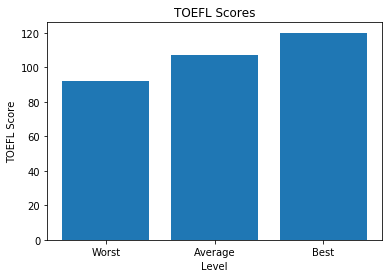

In [29]:
#TOEFL
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

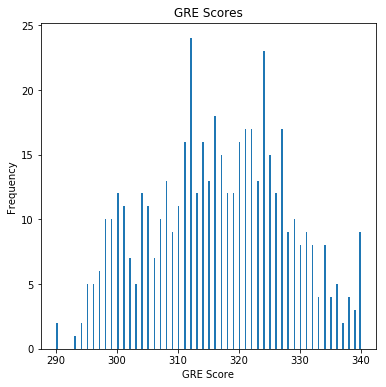

In [30]:
#GRE
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

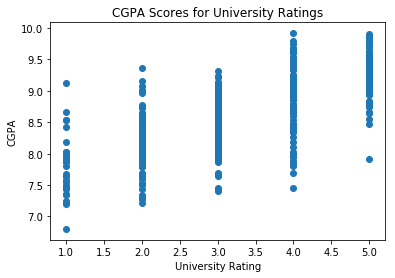

In [31]:
#university rating v/s CGPA
plt.scatter(df["University Rating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

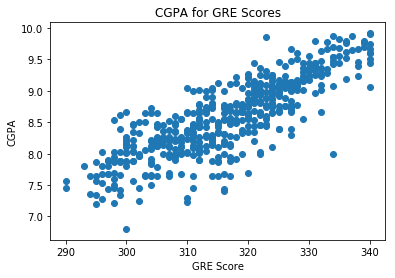

In [32]:
#CGPA v/s GRE
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

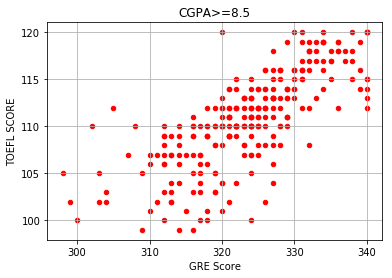

In [33]:
#TOEFL v/s GRE
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

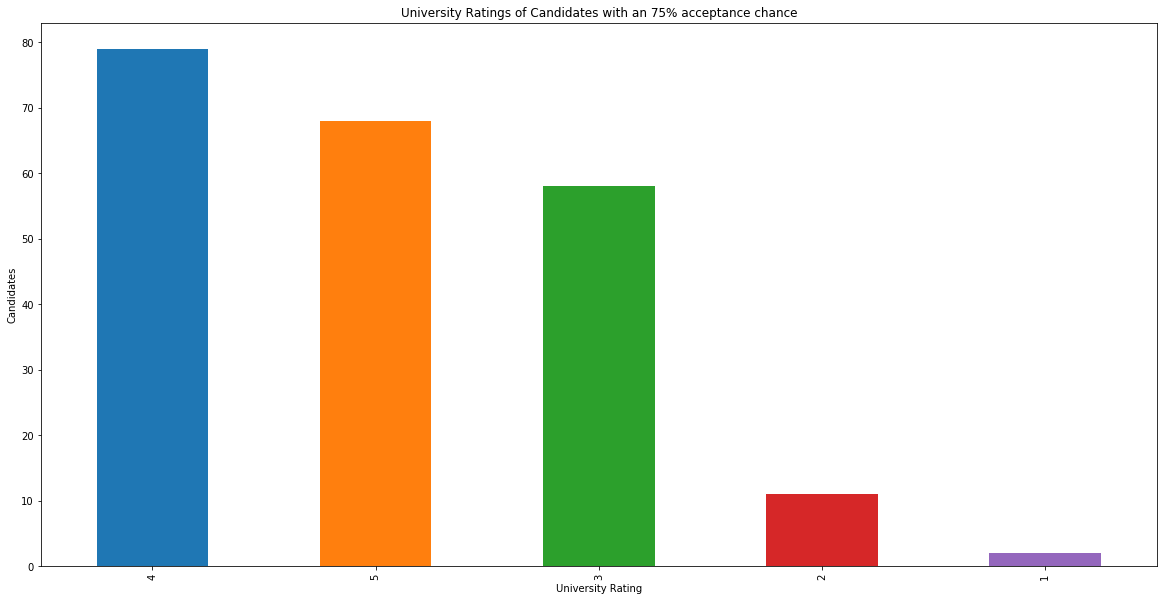

In [34]:
s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

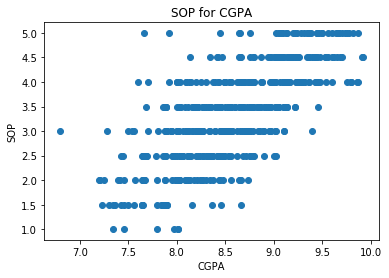

In [35]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

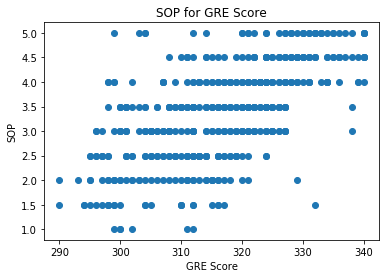

In [36]:
plt.scatter(df["GRE Score"],df["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

In [40]:
df = pd.read_csv("../input/Admission_Predict_Ver1.1.csv",sep = ",")
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [41]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

In [42]:
#self implemented functions here
def train_test_split(x,y,test_size):
    i = int(len(x)*(1-test_size))
    return x[0:i],x[i:],y[0:i],y[i:]

def lin_reg_closedform(x_train,y_train):
    z = np.ones((x_train.shape[0],1))
    x_train = np.append(x_train, z, axis=1)
    w = np.matmul(np.linalg.inv(np.matmul(np.transpose(x_train),x_train)),np.matmul(np.transpose(x_train),y_train))
    return w

def square_loss_func(x,y):
    return np.square(np.subtract(x,y)).mean()

def pred_lin_reg(x,w):
    z = np.ones((x.shape[0],1))
    x = np.append(x, z, axis=1)
    return np.matmul(x,w)

def ridge_reg_closedform(x_train,y_train,reg_const):
    z = np.ones((x_train.shape[0],1))
    x_train = np.append(x_train, z, axis=1)
    a1 = np.matmul(np.transpose(x_train),x_train)
    a2 = np.linalg.inv(a1+reg_const*np.matrix(np.identity(len(a1))))
    a3 = np.matmul(np.transpose(x_train),y_train)
    w = np.matmul(a2,a3.reshape(x_train.shape[1],1))
    return np.asarray(w)

In [43]:
x_train, x_test,y_train, y_test = train_test_split(x,y,0.20)

 MSE Linear Reg =  0.0018431744376047512
 MSE Ridge Reg =  0.0328635706640772


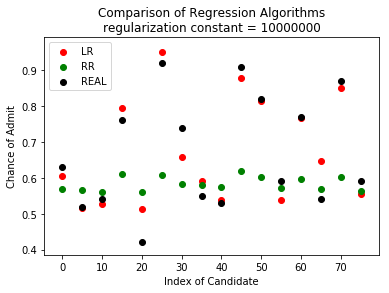

In [52]:
# Regression
#Show variations with different regularization const
reg_const=10000000
res_LR = pred_lin_reg(x_test,lin_reg_closedform(x_train,y_train))
res_RR = pred_lin_reg(x_test,ridge_reg_closedform(x_train,y_train,reg_const))

print(" MSE Linear Reg = ", square_loss_func(res_LR,y_test))
print(" MSE Ridge Reg = ", square_loss_func(res_RR,y_test))

red = plt.scatter(np.arange(0,80,5),res_LR[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),res_RR[0:80:5],color = "green")
#blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms\nregularization constant = "+str(reg_const))
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,black),('LR','RR','REAL'))
plt.show()